In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pickle


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "c:\Users\PC-DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "c:\Users\PC-DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\traitlets\config\application.py", line 1053, in launch_instance
    app.start()
  File "c:\Users\PC-DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\ipykernel\kernelapp

AttributeError: _ARRAY_API not found

ImportError: numpy.core._multiarray_umath failed to import

ImportError: numpy.core.umath failed to import

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
df.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [4]:
df['proto'].unique()

array(['udp', 'arp', 'tcp', 'igmp', 'ospf', 'sctp', 'gre', 'ggp', 'ip',
       'ipnip', 'st2', 'argus', 'chaos', 'egp', 'emcon', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'trunk-2',
       'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'netblt', 'mfe-nsp',
       'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp', 'tp++', 'ipv6',
       'sdrp', 'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp', 'rvd',
       'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any', 'ipv6-opts',
       'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn',
       'pvp', 'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'vines',
       'nsfnet-igp', 'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp',
       'ax.25', 'ipip', 'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp',
       'ifmp', 'pnni', 'qnx', 'scps', 'cbt', 'bbn-rcc', 'igp', 'bna',
       'swipe', 'visa', 'ipcv', 'cphb', 'iso-tp4', 'wb-expak', 'sep',
       'secure-vmtp', 'xtp', 'il', 'rsvp', 'unas', 'fc', 'iso-ip',


In [5]:
protocol_list = ['udp', 'arp', 'tcp', 'igmp', 'ospf', 'sctp', 'gre', 'ggp', 'ip',
       'ipnip', 'st2', 'argus', 'chaos', 'egp', 'emcon', 'nvp', 'pup',
       'xnet', 'mux', 'dcn', 'hmp', 'prm', 'trunk-1', 'trunk-2',
       'xns-idp', 'leaf-1', 'leaf-2', 'irtp', 'rdp', 'netblt', 'mfe-nsp',
       'merit-inp', '3pc', 'idpr', 'ddp', 'idpr-cmtp', 'tp++', 'ipv6',
       'sdrp', 'ipv6-frag', 'ipv6-route', 'idrp', 'mhrp', 'i-nlsp', 'rvd',
       'mobile', 'narp', 'skip', 'tlsp', 'ipv6-no', 'any', 'ipv6-opts',
       'cftp', 'sat-expak', 'ippc', 'kryptolan', 'sat-mon', 'cpnx', 'wsn',
       'pvp', 'br-sat-mon', 'sun-nd', 'wb-mon', 'vmtp', 'ttp', 'vines',
       'nsfnet-igp', 'dgp', 'eigrp', 'tcf', 'sprite-rpc', 'larp', 'mtp',
       'ax.25', 'ipip', 'aes-sp3-d', 'micp', 'encap', 'pri-enc', 'gmtp',
       'ifmp', 'pnni', 'qnx', 'scps', 'cbt', 'bbn-rcc', 'igp', 'bna',
       'swipe', 'visa', 'ipcv', 'cphb', 'iso-tp4', 'wb-expak', 'sep',
       'secure-vmtp', 'xtp', 'il', 'rsvp', 'unas', 'fc', 'iso-ip',
       'etherip', 'pim', 'aris', 'a/n', 'ipcomp', 'snp', 'compaq-peer',
       'ipx-n-ip', 'pgm', 'vrrp', 'l2tp', 'zero', 'ddx', 'iatp', 'stp',
       'srp', 'uti', 'sm', 'smp', 'isis', 'ptp', 'fire', 'crtp', 'crudp',
       'sccopmce', 'iplt', 'pipe', 'sps', 'ib']

# Create a dictionary mapping protocol names to numeric values
protocol_mapping = {protocol: index + 1 for index, protocol in enumerate(protocol_list)}

# Convert protocol names to numeric values in the DataFrame
df['proto_code'] = df['proto'].map(protocol_mapping)
df_test['proto_code'] = df_test['proto'].map(protocol_mapping)

In [6]:
df['service'].unique()

array(['-', 'http', 'ftp', 'ftp-data', 'smtp', 'pop3', 'dns', 'snmp',
       'ssl', 'dhcp', 'irc', 'radius', 'ssh'], dtype=object)

In [7]:
service_list = ['-', 'http', 'ftp', 'ftp-data', 'smtp', 'pop3', 'dns', 'snmp',
       'ssl', 'dhcp', 'irc', 'radius', 'ssh']

service_mapping = {service: index + 1 for index, service in enumerate(service_list)}

df['service_code'] = df['service'].map(service_mapping)
df_test['service_code'] = df_test['service'].map(service_mapping)

In [8]:
df['service_code'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [9]:
df['state'].unique()

array(['INT', 'FIN', 'REQ', 'ACC', 'CON', 'RST', 'CLO'], dtype=object)

In [10]:
state_list = ['INT', 'FIN', 'REQ', 'ACC', 'CON', 'RST', 'CLO']

state_mapping = {state: index + 1 for index, state in enumerate(state_list)}

df['state_code'] = df['state'].map(state_mapping)
df_test['state_code'] = df_test['state'].map(state_mapping)

In [11]:
df['attack_cat'].unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [12]:
attack_list = ['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic']

attack_mapping = {attack: index + 1 for index, attack in enumerate(attack_list)}

df['attack_code'] = df['attack_cat'].map(attack_mapping)
df_test['attack_code'] = df_test['attack_cat'].map(attack_mapping)

In [13]:
df = df.drop(columns=['attack_code','id'])
df_test = df_test.drop(columns=['attack_code','id'])

In [14]:
df = df.select_dtypes(exclude='object')
df_test = df_test.select_dtypes(exclude='object')

In [15]:
df1 = pd.concat([df,df_test],ignore_index=True)

EDA

In [16]:
df1.sample(5)

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label,proto_code,service_code,state_code
71214,0.409649,10,6,534,268,36.616712,254,252,9393.407227,4.374477e+03,...,0,0,0,1,3,0,0,3.0,1,2.0
97103,0.094805,60,62,3614,45696,1276.303963,31,29,299899.781300,3.793808e+06,...,0,0,0,2,7,0,0,3.0,1,2.0
174477,0.504038,10,6,856,268,29.759662,254,252,12237.172850,3.555288e+03,...,0,0,1,1,1,0,1,3.0,2,2.0
241850,0.853084,10,8,564,354,19.927697,254,252,4763.891602,2.907099e+03,...,0,0,0,1,1,0,1,3.0,1,2.0
147822,0.768812,26,20,10814,1672,58.531865,62,252,108208.507800,1.653460e+04,...,0,0,0,1,1,0,1,3.0,5,2.0


In [17]:
correlation_matrix = df1.corr()

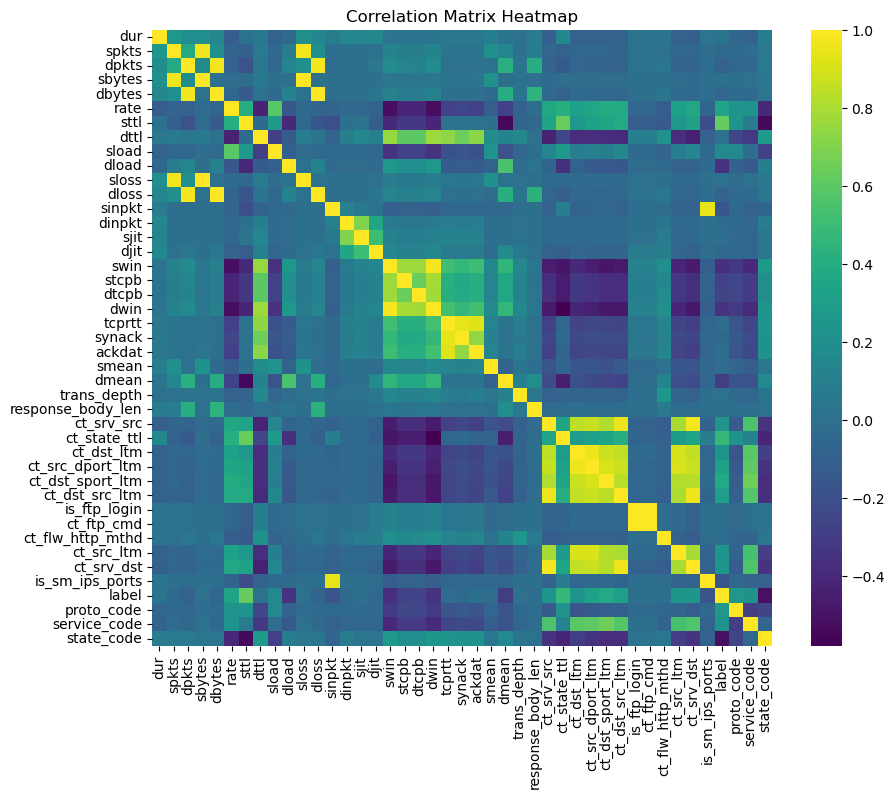

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='viridis')
plt.title('Correlation Matrix Heatmap')
plt.show()

MODELS

In [19]:
import gym
from gym import spaces
import numpy as np
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer

Combined dataset 

In [20]:
p = df1[['dur', 'proto_code', 'service_code', 'state_code', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports']]
n = df1['label']

In [21]:
df1.shape

(257673, 43)

In [33]:
df1.columns

Index(['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl',
       'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit',
       'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean',
       'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label', 'proto_code',
       'service_code', 'state_code'],
      dtype='object')

In [22]:
X1_train, X1_test, y1_train, y1_test = train_test_split(p, n, test_size=0.1, random_state=42)

In [23]:
model1 = RandomForestClassifier()

In [36]:
X1_train.columns

Index(['dur', 'proto_code', 'service_code', 'state_code', 'spkts', 'dpkts',
       'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss',
       'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb',
       'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports'],
      dtype='object')

In [24]:
model1.fit(X1_train, y1_train)

RandomForestClassifier()

In [25]:
y1_pred = model1.predict(X1_test)

In [26]:
accuracy = accuracy_score(y1_test, y1_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9514126047811239


In [27]:
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X1_train_scaled, y1_train)

y_pred = rf_model.predict(X1_test_scaled)

accuracy = accuracy_score(y1_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y1_test, y_pred))

Accuracy: 95.23%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      9359
           1       0.96      0.96      0.96     16409

    accuracy                           0.95     25768
   macro avg       0.95      0.95      0.95     25768
weighted avg       0.95      0.95      0.95     25768



In [38]:
X1_tra

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [31]:
with open('label_model.pkl', 'wb') as model_file:
    pickle.dump(rf_model, model_file)

print("RandomForestClassifier model has been saved as 'label_model.pkl'.")

RandomForestClassifier model has been saved as 'label_model.pkl'.


XGBOOST

In [28]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Train the model
xgb_model.fit(X1_train_scaled, y1_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X1_test_scaled)

# Evaluate the model
accuracy_xgb = accuracy_score(y1_test, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb * 100:.2f}%")
print("Classification Report:")
print(classification_report(y1_test, y_pred_xgb))

/opt/anaconda3/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:33:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 94.98%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      9359
           1       0.97      0.96      0.96     16409

    accuracy                           0.95     25768
   macro avg       0.94      0.95      0.95     25768
weighted avg       0.95      0.95      0.95     25768



MLPClassifier

In [29]:
imputer = SimpleImputer(strategy='mean')
X1_train_clean = imputer.fit_transform(X1_train)
X1_test_clean = imputer.transform(X1_test)

# Scale the data
scaler = StandardScaler()
X1_train_scaled = scaler.fit_transform(X1_train_clean)
X1_test_scaled = scaler.transform(X1_test_clean)

# Initialize the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=300, random_state=42)

# Train the MLP model
mlp_model.fit(X1_train_scaled, y1_train)

# Make predictions on the test set
y_pred_mlp = mlp_model.predict(X1_test_scaled)

# Evaluate the model
accuracy_mlp = accuracy_score(y1_test, y_pred_mlp)
print(f"MLP Accuracy: {accuracy_mlp * 100:.2f}%")
print("Classification Report:")
print(classification_report(y1_test, y_pred_mlp))

MLP Accuracy: 94.02%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      9359
           1       0.95      0.95      0.95     16409

    accuracy                           0.94     25768
   macro avg       0.94      0.94      0.94     25768
weighted avg       0.94      0.94      0.94     25768

